In [2]:
import pandas as pd
from IPython.core.display import HTML
from IPython.core.display import Image 
%load_ext music21.ipython21.ipExtension
import numpy as np
import music21 as mu
import pymongo
%pylab inline
from pymongo import MongoClient
from bs4 import BeautifulSoup
import re
import pydash as py_
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
import math
import music21 as mu
from functools import partial

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)


Populating the interactive namespace from numpy and matplotlib


In [3]:
muAutumnLeaves = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJAutumnLeaves1996_1371_192.xml')
muStellaByStarlight = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJStellaByStarlight1983_1534_161.xml')
muGroovinHigh = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJGroovinHigh1999_1996_290.xml')
muAllTheThingsYouAre = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJAllTheThingsYouAre1983_2143_290.xml')
muIfIWereABell = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJIfIWereABell2002_2161_227.xml')

<h2>Data Preparation</h2>

In [4]:
df = pd.read_pickle('data_set_as_pk.pkl')

<h4><a id="microphrase">Harmony and Rhythm</a></h4>

<div>We have not looked at harmony at all until now, regardless of underlying harmony notes operate in similar ways, there does not emerge broad themes. But what about about harmony? What kinds of notes are played over a dominant sevent chord. What about a major seventh chord. There is a tendency. We can talk about rhythm also, do certain notes occcur at certain times. Major seventh played off the beat on the dominant chord. Prior, generally, leaving all esle aside,  </div>

In [11]:
df[df['chordDisplayName'] == 'C min7b5']['noteDisplayNameNoOctave'].value_counts()

None    364
C        59
Eb       37
F        31
D        30
Bb       28
G        27
Db       17
Ab       11
E        10
A        10
F#        8
Gb        7
B         7
D#        1
C#        1
dtype: int64

<div>THen chords in depth with degrees </div>

In [7]:
df.head(100)

,chordDisplayName,restFlag,performerName,composerName,genre,numberOfParts,title,yearOfComposition,yearOfPerformance,ongoingTempo,part,quarterNoteDuration,midiNumber,noteDisplayName,noteDisplayNameNoOctave,nextNoteFreqDistance,noteEventLocation,noteEventStartingLocation,measure,Location in measure,chordRootAsInt,chordTypeAsInt,chordBassAsInt,chordTypeDisplay
0,E min7b5,note,Keith Jarrett,Victor Young,jazz,2,Stella By Starlight,1943,1983,120,P2,4.00,52,E4,E,-7,4.00,0.00,1,0.00,4,7,-1,min7b5
1,E min7b5,note,Keith Jarrett,Victor Young,jazz,2,Stella By Starlight,1943,1983,120,P1,0.50,55,G4,G,NaN,0.50,0.00,1,0.00,NaN,NaN,NaN,min7b5
2,E min7b5,rest,Keith Jarrett,Victor Young,jazz,2,Stella By Starlight,1943,1983,120,P1,0.50,NaN,NoneNone,None,NaN,1.00,0.50,1,0.50,NaN,NaN,NaN,min7b5
3,E min7b5,rest,Keith Jarrett,Victor Young,jazz,2,Stella By Starlight,1943,1983,120,P1,0.50,NaN,NoneNone,None,NaN,1.50,1.00,1,1.00,NaN,NaN,NaN,min7b5
4,E min7b5,note,Keith Jarrett,Victor Young,jazz,2,Stella By Starlight,1943,1983,120,P1,0.50,57,A4,A,1,2.00,1.50,1,1.50,NaN,NaN,NaN,min7b5
5,E min7b5,note,Keith Jarrett,Victor Young,jazz,2,Stella By Starlight,1943,1983,120,P1,1.00,58,Bb4,Bb,-1,3.00,2.00,1,2.00,NaN,NaN,NaN,min7b5
6,E min7b5,note,Keith Jarrett,Victor Young,jazz,2,Stella By Starlight,1943,1983,120,P1,1.00,57,A4,A,NaN,4.00,3.00,1,3.00,NaN,NaN,NaN,min7b5
7,A dom7,note,Keith Jarrett,Victor Young,jazz,2,Stella By Starlight,1943,1983,120,P2,4.00,45,A3,A,3,8.00,4.00,2,0.00,9,2,-1,dom7
8,A dom7,rest,Keith Jarrett,Victor Young,jazz,2,Stella By Starlight,1943,1983,120,P1,0.50,NaN,NoneNone,None,NaN,4.50,4.00,2,0.00,NaN,NaN,NaN,dom7
9,A dom7,note,Keith Jarrett,Victor Young,jazz,2,Stella By Starlight,1943,1983,120,P1,0.50,55,G4,G,3,5.00,4.50,2,0.50,NaN,NaN,NaN,dom7


In [44]:
note0 = mu.note.Note("F5")
note0.duration.type = 'half'
note1 = mu.note.Note("C4")
note1.duration.type = 'eighth'
note2 = mu.note.Note("F#4")

streamOne = mu.stream.Stream()
streamOne.append(note0)
streamOne.append(note1)
streamOne.append(note2)

In [45]:
#streamOne.show()

<div>The first thing we might ask is to keep key relvant. what is the most common figure that might be found</div>

<h4><a id="rhythm">The use of rhythm !!!!!</a></h4>

<h4><a id="tempo">The influence of tempo!!!!</a></h4>

<h4><a id="timeSignaure">The influence of time signature!!!!</a></h4>

<h4><a id="songLocation">How melodic phrases are affected by the place they occur!!!</a></h4>

<h4><a id="songLocation">More so[histicated stuff</a></h4>

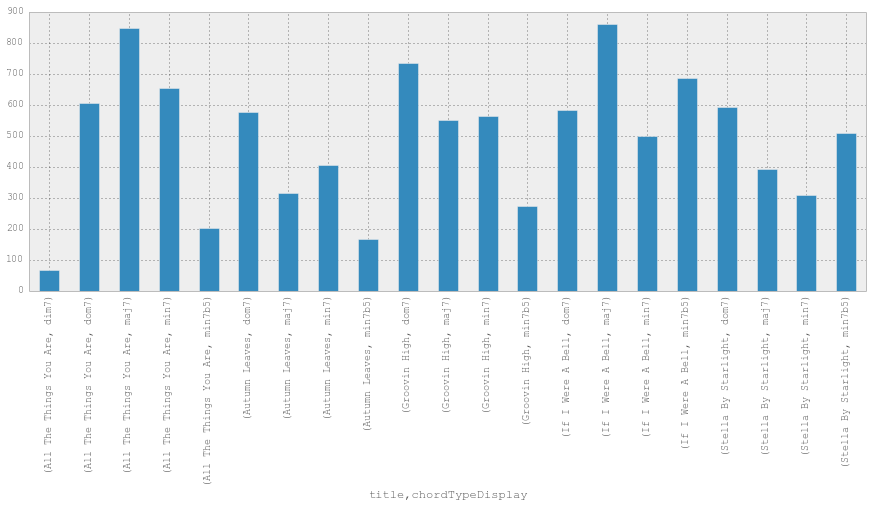

In [37]:
df.groupby(['title', 'chordTypeDisplay'])['chordTypeDisplay'].count().plot(kind="bar")